In [5]:
import geopandas as gpd                 # geodataframes
import matplotlib.pyplot as plt         # mapping
import contextily as cx                 # basemaps

In [6]:
'''
Get IBX ROW & Stations (local file)
'''
ibx_path = r"C:\Users\orinj\Documents\Urban Planning\GIS Data\IBX\IBX.gdb"

# Find layers in geodatabase file
layers = gpd.list_layers(ibx_path)
layer_names = layers['name'].to_list()

# Store each layer as a geodataframe in a dictionary with index as name
geodataframes = {}
for name in layer_names:
    geodataframes[name] = gpd.read_file(ibx_path, layer=name)

# Save each layer as a named geodataframe
ibx_gdf = geodataframes['IBX_Rail_Line']
stations_gdf = geodataframes['stations']

In [7]:
'''
Update CRS for webtile basemaps
''' 
ibx_gdf_3857 = ibx_gdf.to_crs(epsg=3857)  # CRS for webtiles
stations_gdf_3857 = stations_gdf.to_crs(epsg=3857)  # CRS for webtiles

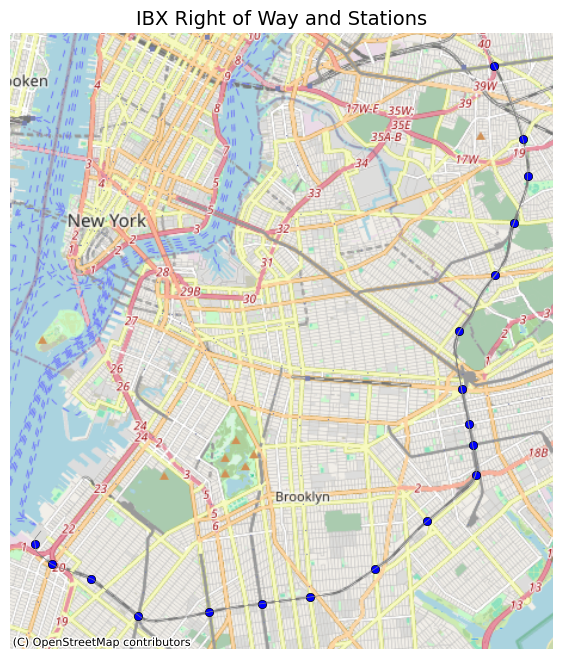

In [8]:
''' 
Plot IBX ROW & Stations map
'''
# Set up plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot geodataframes
ibx_gdf_3857.plot(ax=ax, color="gray", edgecolor="black", linewidth=0.5)
stations_gdf_3857.plot(ax=ax, color="blue", edgecolor="black", linewidth=0.5)

# Plot basemap
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, zoom=12)

# title with attribute value (optional)
ax.set_title("IBX Right of Way and Stations", fontsize=14)

# remove axes
ax.set_axis_off()

plt.show()
